In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

from local_python.plot_utils import (
    plot_distribution_barh,
    plot_example_images
)

In [2]:
data_split_dir = "../data_splits/"
config_path = "../datasets/plot_images_samples.csv"
dataset_name = "PlantVillage"
title = dataset_name

In [3]:
df_config = pd.read_csv(config_path)

dataset_path = None
for filename in os.listdir(data_split_dir):
    if dataset_name.lower() in filename.lower():
        dataset_path = os.path.join(data_split_dir, filename)
        break

df_full = pd.read_csv(dataset_path, index_col=0)
print(f"Available columns: {df_full.columns.values}")

def beautify_names(name):
    return re.sub(r"_+", " ", re.sub(r"\(.*\)", "", name))

Available columns: ['target_code' 'filepath' 'set']


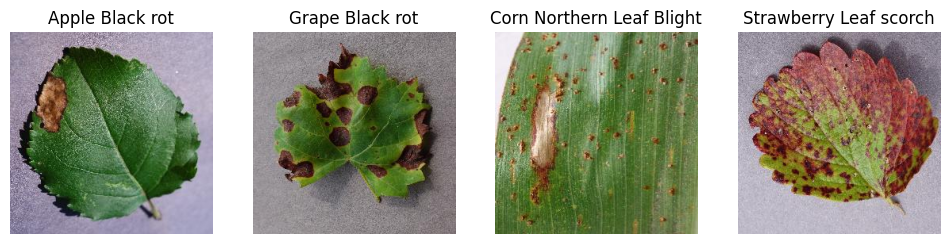

In [4]:
df_config = df_config[df_config["dataset"]==dataset_name]
df_plot = df_config.copy()
df_plot["target_code"] = df_plot["target_code"].apply(beautify_names)

plt.figure(figsize=(12, 7))
title = f"Example images of {dataset_name}"
plot_example_images(df_plot[["filepath", "target_code"]].values)
filename = title.lower().replace(" ", "_") + ".png"
plt.savefig(os.path.join(f"../images/", filename), bbox_inches="tight")

38 classes with distribution: {'Apple Apple scab': 0, 'Apple Black rot': 1, 'Apple Cedar apple rust': 2, 'Apple healthy': 3, 'Blueberry healthy': 4, 'Cherry healthy': 5, 'Cherry Powdery mildew': 6, 'Corn Cercospora leaf spot Gray leaf spot': 7, 'Corn Common rust ': 8, 'Corn healthy': 9, 'Corn Northern Leaf Blight': 10, 'Grape Black rot': 11, 'Grape Esca ': 12, 'Grape healthy': 13, 'Grape Leaf blight ': 14, 'Orange Haunglongbing ': 15, 'Peach Bacterial spot': 16, 'Peach healthy': 17, 'Pepper, bell Bacterial spot': 18, 'Pepper, bell healthy': 19, 'Potato Early blight': 20, 'Potato healthy': 21, 'Potato Late blight': 22, 'Raspberry healthy': 23, 'Soybean healthy': 24, 'Squash Powdery mildew': 25, 'Strawberry healthy': 26, 'Strawberry Leaf scorch': 27, 'Tomato Bacterial spot': 28, 'Tomato Early blight': 29, 'Tomato healthy': 30, 'Tomato Late blight': 31, 'Tomato Leaf Mold': 32, 'Tomato Septoria leaf spot': 33, 'Tomato Spider mites Two-spotted spider mite': 34, 'Tomato Target Spot': 35, 'To

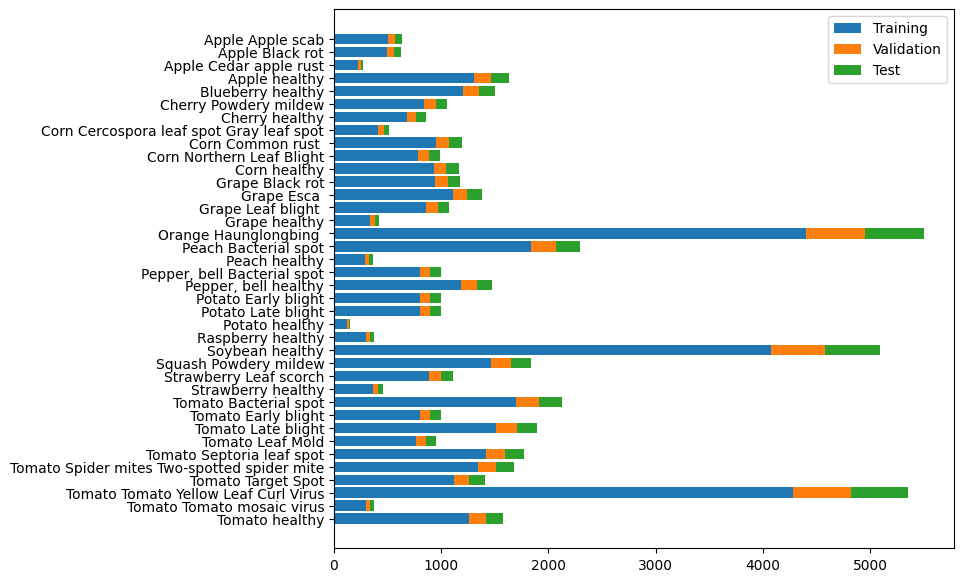

In [5]:
df_plot = df_full.copy()
df_plot["target_code"] = df_plot["target_code"].apply(beautify_names)
df_plot["set"] = df_plot["set"].replace(
    to_replace=["train", "valid", "test"], value=["Training", "Validation", "Test"]
)

label_map = {
    label: idx for idx, label in enumerate(df_plot["target_code"].unique())
}  # NOTE: Keep original order
num_classes = len(label_map)
print(f"{num_classes} classes with distribution: {label_map}")

plt.figure(figsize=(8, 7))
title = f"Class distribution of {dataset_name}"
plot_distribution_barh(df_plot)  # , title=title
filename = title.lower().replace(" ", "_") + ".png"
plt.savefig(os.path.join(f"../images/", filename), bbox_inches="tight")

In [ ]:
# images, targets = next(iter(dl_valid))

# normalise_mean = (0.485, 0.456, 0.406)  # ImageNet
# normalise_std = (0.229, 0.224, 0.225)  # ImageNet

# number_of_rows = 2
# number_of_columns = 2

# fig, ax = plt.subplots(
#     number_of_rows,
#     number_of_columns,
#     figsize=(3 * number_of_columns, 3 * number_of_rows),
#     squeeze=False,
# )

# for i_col in range(number_of_columns):
#     for i_row in range(number_of_rows):
#         i = i_col * number_of_columns + i_row
#         img = transforms.ToPILImage()(
#             images[i].cpu() * torch.tensor(normalise_std)[:, None, None]
#             + torch.tensor(normalise_mean)[:, None, None]
#         )
#         ax[i_row][i_col].axis("off")
#         ax[i_row][i_col].imshow(img)
#         ax[i_row][i_col].set_title(f"Sample of class {targets[i]}")